<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Early_Stopping_In_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Whenever we train our artificial neural network on given data,we have to tell on how many epochs we have to train the neural network.How would we know that what should be the correct value of number of epochs?

If we give higher number of epochs then it might overfit the neural network model which means we will get better accuracy on train data but very poor accuracy on test data.

Lets build sequential neural network and try to find best number of epochs for training.

In [12]:
#Importing dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from  mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns



In [13]:
#Creating a classificaton datasset from make circles
x,y = make_circles(n_samples=100, noise=0.2, random_state=1)
#We will have 100 datapoints in our dataset
#Noise defines how randomly scattered your datset is

<Axes: >

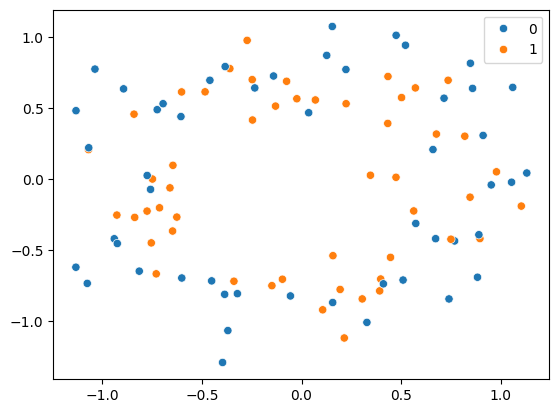

In [14]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [15]:
#Splitting dataset in train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
#Now defining the odel architecture
model = Sequential()
model.add(Dense(256,input_dim=2,activation = 'relu')) #THis is the hidden layer in which we have total of 256 neurons
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#COmpiling the model
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])

In [18]:
#We will fit the model on training dataset and store it in history
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000,verbose = 1)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - Accuracy: 0.5375 - loss: 0.6929 - val_Accuracy: 0.4500 - val_loss: 0.7052
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - Accuracy: 0.5063 - loss: 0.6925 - val_Accuracy: 0.4000 - val_loss: 0.7080
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - Accuracy: 0.5305 - loss: 0.6921 - val_Accuracy: 0.3500 - val_loss: 0.7100
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - Accuracy: 0.5203 - loss: 0.6880 - val_Accuracy: 0.3500 - val_loss: 0.7125
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - Accuracy: 0.4852 - loss: 0.6879 - val_Accuracy: 0.3500 - val_loss: 0.7139
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - Accuracy: 0.5992 - loss: 0.6835 - val_Accuracy: 0.3500 - val_loss: 0.7154
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - Accuracy: 0.5688 - loss: 0.6859 - val_Accuracy: 0.3500 - val_loss: 0.7160
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - Accuracy: 0.5414 - loss: 0.6875 - val_Accuracy: 0.3500 - 

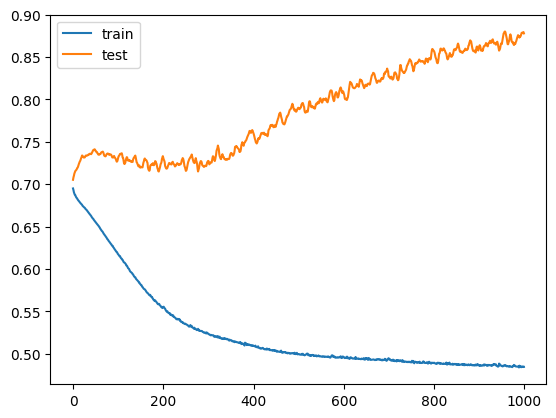

In [19]:
#Now we will draw the trining loss and validation loss graphs
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

Here in the graph we can observe that after nearly 300 epochs,validation loss is getting increase.This suggest that there is overfitting happening in our model. To rectify this issue,we have early stopping concept in deep learing where it automatically find out the stage where loss function is increasing. As soon as Early Stopping detects increasing loss function,it stops the training of neural network

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


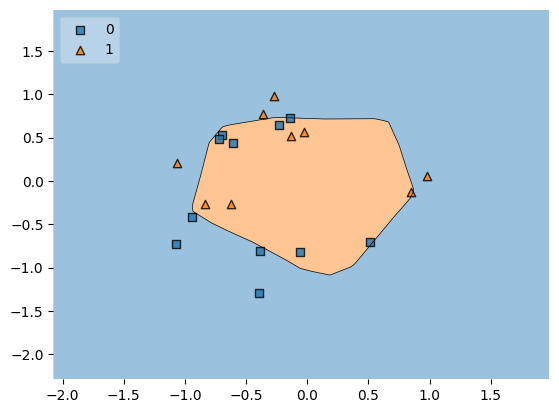

In [24]:
plot_decision_regions(x_test,y_test.ravel(),clf = model,legend=2)
plt.show()
#Following is the decision boundry

Now implementation of Early Stopping-

In [25]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
callback = EarlyStopping(
    monitor = "val_loss",  #We have to apply early stopping on basis of val_loss
    min_delta = 0.0001,  #It tells the minimum change in the monitored quantity to quantify as an improvement
    patience = 20,     #Number of epochs with no improvement after which training will be stopped.
    verbose = 1,      #We have to see the logs so we will set verbose as
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [30]:
#Fitting the model on train dataset
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 1000,callbacks = callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.5109 - loss: 0.6936 - val_accuracy: 0.6500 - val_loss: 0.6811
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4922 - loss: 0.6939 - val_accuracy: 0.6500 - val_loss: 0.6856
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5102 - loss: 0.6925 - val_accuracy: 0.5500 - val_loss: 0.6895
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4703 - loss: 0.6919 - val_accuracy: 0.5500 - val_loss: 0.6927
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4547 - loss: 0.6899 - val_accuracy: 0.5500 - val_loss: 0.6952
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4977 - loss: 0.6872 - val_accuracy: 0.5500 - val_loss: 0.6974
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4984 - loss: 0.6865 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5742 - loss: 0.6833 - val_accuracy: 0.5000 - 

Here observe that our training is stopped after iterating for 21 times.This means that there is no meaning of going forward and continue training neural network.At 21 st epoch only we will get the best neual netwok.

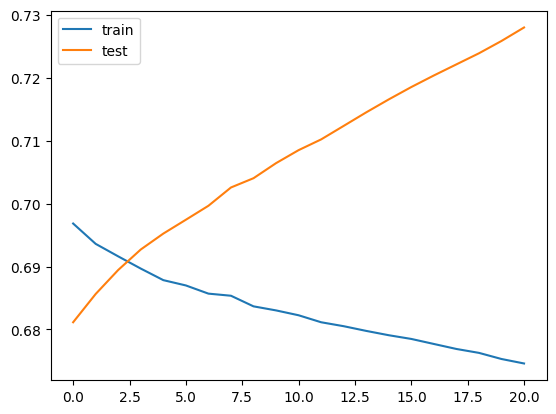

In [31]:
#Now we will draw the trining loss and validation loss graphs
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()
#Here in graph the loss function value is still increasing so
#early stopping method is used to stop it from going for the hifher
# number of epochs for training this neural network.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


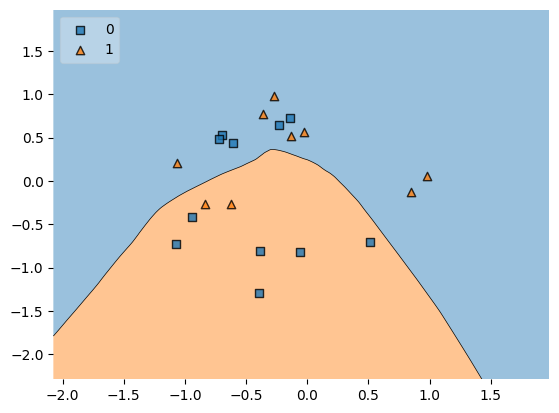

In [32]:
plot_decision_regions(x_test,y_test.ravel(),clf = model,legend=2)
plt.show()
#Following is the decision boundry